# Text Classification Workflow with `arcgis.learn`

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2">Prerequisites</a></span></li>
    <ul class="toc-item">
        <li><span><a href="#Transformer-Basics" data-toc-modified-id="Transformer-Basics-2.1">Transformer Basics</a></span></li>
        <li><span><a href="#How-to-choose-an-appropriate-model-for-your-dataset?" data-toc-modified-id="How-to-choose-an-appropriate-model-for-your-dataset?-2.3">How to choose an appropriate model for your dataset?</a></span>
    </ul>

<li><span><a href="#Supported-formats-for-labeled-training-data" data-toc-modified-id="Supported-formats-for-labeled-training-data-3">Supported formats for labeled training data</a></span></li>
    
<li><span><a href="#Imports" data-toc-modified-id="Imports-2">Imports</a></span></li>
<li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3">Data preparation</a></span></li>
<li><span><a href="#EntityRecognizer-model" data-toc-modified-id="EntityRecognizer-model-4">EntityRecognizer model</a></span></li>
<ul class="toc-item">
<li><span><a href="#Model-training" data-toc-modified-id="Model-training-4.1">Model training</a></span>
<li><span><a href="#Validate-results" data-toc-modified-id="Validate-results-4.2">Validate results</a></span></li>
<li><span><a href="#Save-and-load-trained-models" data-toc-modified-id="Save-and-load-trained-models-4.3">Save and load trained models</a></span></li>
</ul>
<li><span><a href="#Model-inference" data-toc-modified-id="Model-inference-5">Model inference</a></span></li>
<li><span><a href="#Visualize-entities" data-toc-modified-id="Visualize-entities">Visualize entities</a></span></li>
<li><span><a href="#Convert-to-feature-layer-and-visualize-on-map" data-toc-modified-id="Convert-to-feature-layer-and-visualize-on-map-7">Convert to feature layer and visualize on map</a></span></li>
<li><span><a href="#References" data-toc-modified-id="References-8">References</a></span></li>
</ul>
</div>

# Introduction


Text classification also known as text tagging or text categorization is the process of assigning tags/labels to an unstructured text. Using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content. 

As with any other classification problem, text classification can be broadly divided into 2 different categories:

- **Multi-Class Text Classification**
- **Multi-Label Text Classification**

### Multi-Class Text Classification
For the set of problems where one can associate only a single label to a given input text falls into this category. Take an example of an house address. The address can be associated to a single country. Hence classifying/ tagging a house address to a country is an example of multi-class text clasification problem. Other examples include:
- **Sentiment Analyis** on tweets/movie reviews.
- Classifying emails as **Spam VS not Spam**
- **Language detection** from text

### Multi-Label Text Classification
For the set of problems where one can associate multiple labels to a given input text falls into this category. Take an example where we are moderating a social media platform by flagging inappropriate user comments and posts. An inappropriate posts can fall into multiple categories like toxic, threat, insult, obsene etc. Other examples include:
- **Analyze customer support tickets** to quickly assign appropriate categories.
- **Categorization of News Articles** into appropriate topics.



# Prerequisites

The `TextClassifier` class in `arcgis.learn.text` module is based on [Hugging Face Transformer](https://huggingface.co/transformers/v3.0.2/index.html) library. This library provides general purpose architectures / transformer models like BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet etc., for **Natural Language Understanding (NLU)** and **Natural Language Generation (NLG)** with over 32+ pretrained models in 100+ languages.

The transformers are the most latest and advance models that gives state of the art results for a wide range of tasks such as **text/sequence classification**, **named entity recognition (ner)**, **question answering**, **machine translation**, **text summarization**, **text generation** etc.

## Transformer Basics

Transformers in NLP are novel architectures that aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease. The Transformer was proposed in the paper [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf). A transformer consists of an encoding component, a decoding component, and connections between them.

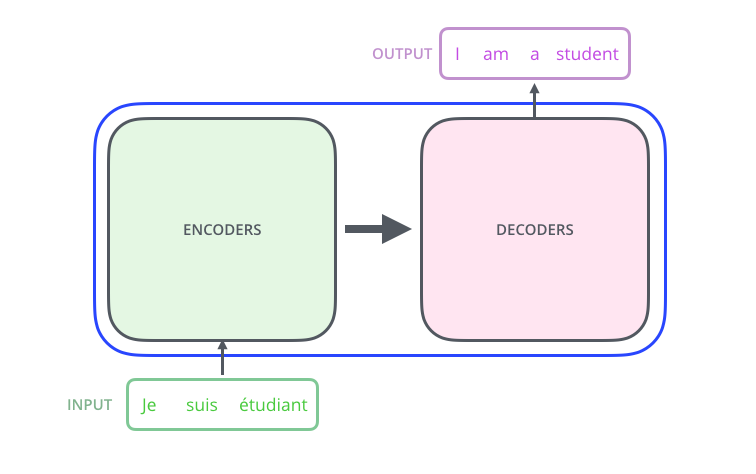

- The **Encoding component** is a stack of encoders (the paper stacks six of them on top of each other). 
- The **Decoding component** is a stack of decoders of the same number. 

The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:
- **Self-Attention Layer**
  - Say the following sentence is an input sentence we want to translate:
  
    **`The animal didn't cross the street because it was too tired`**
    
    What does **"it"** in this sentence refer to? Is it referring to the **street** or to the **animal**? It's a simple question to a human, but not as simple to an algorithm. When the model is processing the word **"it"**, self-attention allow the model to associate **"it"** with **"animal"**.

- **Feed Forward Layer** - The outputs of the self-attention layer are fed to a feed-forward neural network. 

The decoder has both those layers (**self-attention** & **feed forward layer**), but between them is an **attention layer** (sometimes called **encoder-decoder attention**) that helps the decoder focus on relevant parts of the input sentence.

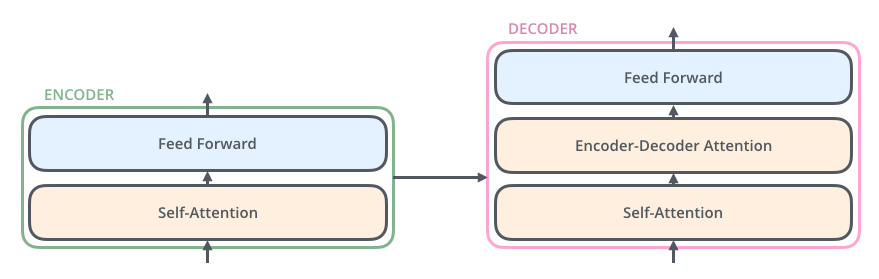

To get a more detail explaination on how attention mechanism works in transformer models one can visit [this page](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)  

## How to choose an appropriate model for your dataset?

[This page](https://huggingface.co/transformers/v3.0.2/pretrained_models.html) mentions different trasformer architectures which comes in different sizes (model parameters), trained on different languages /corpus, having different attention heads etc,. Not every model can be used for `text classification` purpose. As of now, there are around 13 models which can be used to perform `text classification`. These are `BERT`, `RoBERTa`, `DistilBERT`, `ALBERT`, `FlauBERT`, `CamemBERT`, `XLNet`, `XLM`, `XLM-RoBERTa`, `Bart`, `ELECTRA`, `Longformer` and `MobileBERT`


Some consideration has to be made in order to pick the right transformer architecture for the problem in hand. 
- Some models like `BERT`, `RoBERTa`, `XLNET`, `XLM-RoBERTa` are highly accurate models but at the same time are pretty large in size. Generating inference from these models is somewhat slow.
- If one whishes to sacrifice a little accuracy over a high inferencing and training speed one can go with `DistilBERT`.
- If model size is a constraint then one can either choose `ALBERT` or `MobileBERT`. Remember the model performance will not be as great compared to models like `BERT`, `RoBERTa`, `XLNET` etc,.
- If you have a dataset in French language one can choose from `FlauBERT` or `CamemBERT`as these language model are trained on French text.
- When dealing with long sentences/sequences in training data one can choose from `XLNET`, `Longformer`, `Bart`.
- Some models are [multi-lingual models](https://huggingface.co/transformers/v3.0.2/multilingual.html) i.e, models trained on multiple languages. If you dataset consists of text in multiple languages you can chooses models mentioned in the above link. 
  - The models sizes of these transformer architectures are very large (in GBs). 
  - They require large momory to fine tune on a particular dataset.
  - Due to the large size of these models inferencing a fined-tuned model will be somewhat slow on CPU.

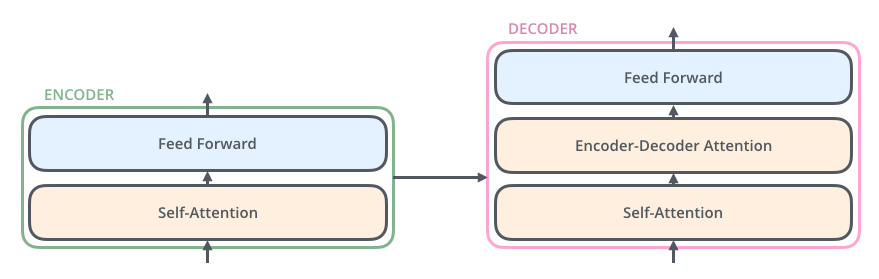

In [7]:
from IPython.display import Image
Image(filename=r"C:\Users\anu10961\Pictures\Transformer_decoder.png")

## How to choose an appropriate model for your dataset?